In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
  'co2': [95, 90, 99, np.nan, 105, 94, np.nan, 104],
  'model': ['Citigo', 'Fabia', 'Fiesta', 'Rapid', 'Focus', 'Mondeo', 'Octavia', 'B-Max'],
  'car': ['Skoda', 'Skoda', 'Ford', 'Skoda', 'Ford', 'Ford', 'Skoda', 'Ford']
}

df = pd.DataFrame(data)
df

,co2,model,car
0,95.0,Citigo,Skoda
1,90.0,Fabia,Skoda
2,99.0,Fiesta,Ford
3,NaN,Rapid,Skoda
4,105.0,Focus,Ford
5,94.0,Mondeo,Ford
6,NaN,Octavia,Skoda
7,104.0,B-Max,Ford


Finding missing values

In [4]:
df.isna().sum()

co2      2
model    0
car      0
dtype: int64

Treat missing values

In [5]:
df['co2'] = df['co2'].fillna(df['co2'].mean())

In [6]:
df.isna().sum()

co2      0
model    0
car      0
dtype: int64

In [7]:
df

,co2,model,car
0,95.000000,Citigo,Skoda
1,90.000000,Fabia,Skoda
2,99.000000,Fiesta,Ford
3,97.833333,Rapid,Skoda
4,105.000000,Focus,Ford
5,94.000000,Mondeo,Ford
6,97.833333,Octavia,Skoda
7,104.000000,B-Max,Ford


In [8]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

c:\Users\singi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Box plot method for identifying outlier

<AxesSubplot: >

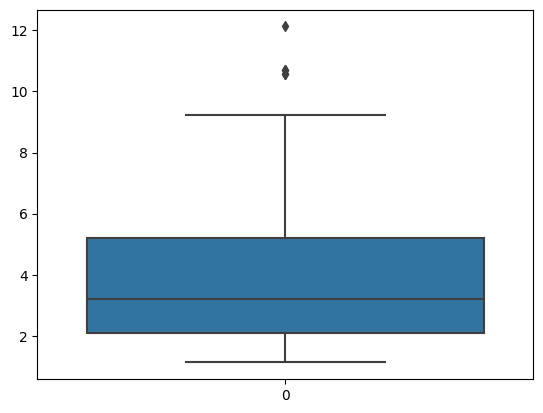

In [9]:
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In [10]:
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


Interquartile range (IQR) method for identifying outlier

Identifying the quartiles (Q1 or quartile 1 is the 25th percentile of the range and so on)
* Q1 = 25th Percentile
* Q2 = 50th Percentile
* Q3 = 75th Percentile
* Q4 = 100th Percentile

and IQR is the difference between Q3 - Q1

In [13]:
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

C:\Users\singi\AppData\Local\Temp\ipykernel_11908\1724688180.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_boston['DIS'], 25,
C:\Users\singi\AppData\Local\Temp\ipykernel_11908\1724688180.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df_boston['DIS'], 75,


In [17]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print(np.where(lower))

(array([351, 352, 353, 354, 355], dtype=int64),)
(array([], dtype=int64),)
